In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
sns.set_style('whitegrid')

In [4]:
np.random.seed(1767)

Your task is to predict the Site EUI for each row, given the characteristics of the building and the weather data for the location of the building. 

In [94]:
df = pd.read_csv('./data/train.csv.zip').drop(columns=['id'])
df.columns = df.columns.str.lower()

In [95]:
test_df = pd.read_csv('./data/test.csv.zip').drop(columns=['id'])
test_df.columns = test_df.columns.str.lower()

In [96]:
df.head()

,year_factor,state_factor,building_class,facility_type,floor_area,year_built,energy_star_rating,elevation,january_min_temp,january_avg_temp,...,days_below_0f,days_above_80f,days_above_90f,days_above_100f,days_above_110f,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395


In [97]:
df.describe()

,year_factor,floor_area,year_built,energy_star_rating,elevation,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_below_0f,days_above_80f,days_above_90f,days_above_100f,days_above_110f,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,0.876764,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,2.894244,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,0.000000,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,0.000000,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,0.000000,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,31.000000,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120


In [98]:
test_df.clip().describe()

,year_factor,floor_area,year_built,energy_star_rating,elevation,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_below_10f,days_below_0f,days_above_80f,days_above_90f,days_above_100f,days_above_110f,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog
count,9705.0,9.705000e+03,9613.000000,7451.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,...,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.0,1130.000000,1130.000000,1130.000000,588.000000
mean,7.0,1.632143e+05,1963.219598,64.712924,205.231190,13.520762,36.678081,60.008449,21.705100,41.634886,...,5.371561,1.323029,66.820093,11.941267,0.211643,0.0,321.743363,310.194690,18.131327,150.755102
std,0.0,2.624759e+05,40.819953,27.935984,264.822814,12.458365,6.968520,5.874699,9.774624,5.528689,...,6.676871,2.205729,30.936872,13.077936,0.615250,0.0,19.127690,38.969875,1.993348,58.760576
min,7.0,5.982000e+03,0.000000,1.000000,1.800000,-1.000000,27.548387,42.000000,9.000000,33.428571,...,0.000000,0.000000,15.000000,1.000000,0.000000,0.0,280.000000,240.000000,14.800000,34.000000
25%,7.0,4.802000e+04,1929.000000,45.000000,26.500000,-1.000000,27.548387,54.000000,9.000000,36.053571,...,0.000000,0.000000,39.000000,3.000000,0.000000,0.0,310.000000,270.000000,16.500000,129.000000
50%,7.0,8.248600e+04,1969.000000,72.000000,118.900000,15.000000,38.661290,59.000000,22.000000,41.625000,...,0.000000,0.000000,77.000000,5.000000,0.000000,0.0,330.000000,320.000000,18.300000,129.000000
75%,7.0,1.775200e+05,1994.000000,88.000000,231.300000,21.000000,41.177419,64.000000,28.000000,45.685185,...,14.000000,5.000000,79.000000,12.000000,0.000000,0.0,340.000000,340.000000,19.200000,138.000000
max,7.0,6.353396e+06,2016.000000,100.000000,812.000000,38.000000,50.596774,71.000000,40.000000,54.482143,...,14.000000,5.000000,122.000000,41.000000,2.000000,0.0,360.000000,350.000000,23.300000,250.000000


In [99]:
cat_columns = list(df.select_dtypes(['object']).columns)
cat_columns

['state_factor', 'building_class', 'facility_type']

In [100]:
for cc in cat_columns:
    df[f'{cc}_'] = df[cc].astype('category').cat.codes
    test_df[f'{cc}_'] = test_df[cc].astype('category').cat.codes    
#df = df.drop(columns=cat_columns)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 66 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year_factor                75757 non-null  int64  
 1   state_factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   elevation                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [13]:
df.corr()['site_eui'].sort_values().head()
df.corr()['site_eui'].sort_values().tail()

days_below_30f         0.139811
heating_degree_days    0.147861
snowfall_inches        0.157284
state_factor_          0.165703
site_eui               1.000000
Name: site_eui, dtype: float64

In [14]:
df.corr()['energy_star_rating'].sort_values().tail()

february_avg_temp     0.137479
january_min_temp      0.144452
january_avg_temp      0.149421
energy_star_rating    1.000000
days_above_110f            NaN
Name: energy_star_rating, dtype: float64

## Data exploration

<AxesSubplot:xlabel='floor_area', ylabel='site_eui'>

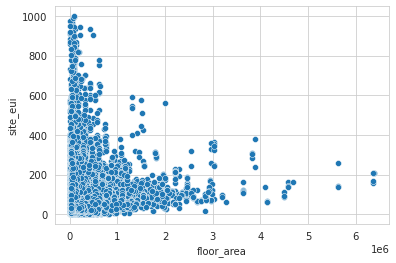

In [15]:
sns.scatterplot(data=df, x='floor_area', y='site_eui')

In [16]:
C = df.corr()

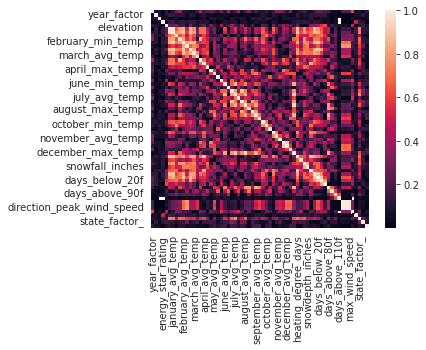

In [17]:
sns.heatmap(np.abs(C))
ax=plt.gca()
ax.set_aspect('equal')

In [18]:
mean_train = df.drop(columns=['site_eui']).describe().loc['mean']
mean_test  = test_df.describe().loc['mean']

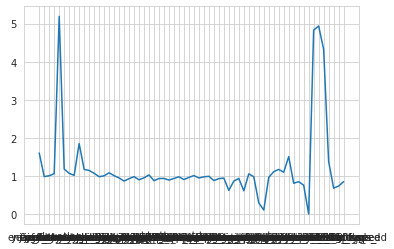

In [19]:
plt.plot(mean_test / mean_train)

In [20]:
tmp = ((mean_test / mean_train - 1).abs() < 0.1)
tmp[tmp==1].index

Index(['floor_area', 'year_built', 'energy_star_rating', 'january_avg_temp',
       'january_max_temp', 'march_min_temp', 'march_avg_temp',
       'march_max_temp', 'april_min_temp', 'april_avg_temp', 'april_max_temp',
       'may_avg_temp', 'may_max_temp', 'june_avg_temp', 'june_max_temp',
       'july_avg_temp', 'july_max_temp', 'august_avg_temp', 'august_max_temp',
       'september_min_temp', 'september_avg_temp', 'september_max_temp',
       'october_min_temp', 'october_avg_temp', 'october_max_temp',
       'november_avg_temp', 'november_max_temp', 'december_max_temp',
       'heating_degree_days', 'precipitation_inches', 'avg_temp',
       'days_below_10f'],
      dtype='object')

In [21]:
len(test_df.columns), len(df.columns)

(65, 66)

In [22]:
df.isna().sum().sort_values(ascending=False).head(30)

days_with_fog                45796
direction_peak_wind_speed    41811
direction_max_wind_speed     41082
max_wind_speed               41082
energy_star_rating           26709
year_built                    1837
december_min_temp                0
precipitation_inches             0
heating_degree_days              0
cooling_degree_days              0
december_max_temp                0
december_avg_temp                0
year_factor                      0
november_max_temp                0
november_avg_temp                0
snowdepth_inches                 0
november_min_temp                0
october_max_temp                 0
october_avg_temp                 0
snowfall_inches                  0
days_below_20f                   0
avg_temp                         0
days_below_30f                   0
september_max_temp               0
days_below_10f                   0
days_below_0f                    0
days_above_80f                   0
days_above_90f                   0
days_above_100f     

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 66 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year_factor                75757 non-null  int64  
 1   state_factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   elevation                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

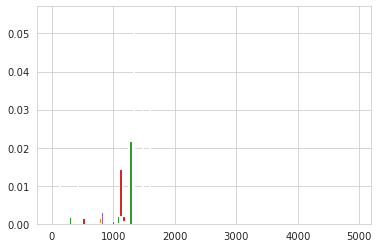

In [70]:
for i in range(1, 7):
    ix = df['year_factor'] == i
    plt.hist(df.loc[ix, 'cooling_degree_days'], bins=100, density=True)

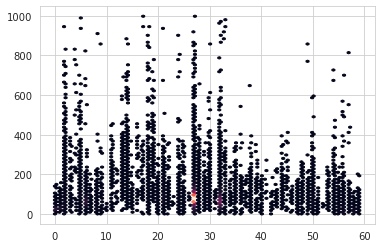

In [78]:
plt.hexbin(df['facility_type_'], df['site_eui'], mincnt=1)

In [101]:
vc = df['facility_type'].value_counts().index

df.loc[:, 'old_facility_type'] = df.loc[:, 'facility_type']
df.loc[:, 'facility_type'] = 'other'

for i in range(6):
    print(vc[i])
    df.loc[:, 'old_facility_type'] == vc[i]
    
    ix = df.loc[:, 'old_facility_type'] == vc[i]
    df.loc[ix, 'facility_type'] = vc[i]
    

df = df.drop(columns='old_facility_type')

Multifamily_Uncategorized
Office_Uncategorized
Education_Other_classroom
Lodging_Hotel
2to4_Unit_Building
Commercial_Other


In [109]:
df = df[~df.index.duplicated(keep='first')]
df.shape

(75757, 66)

 0   year_factor                75757 non-null  int64    # year factor = 7 in test set
 1   state_factor               75757 non-null  object   # later years have more states
 2   building_class             75757 non-null  object   # commercial / residential binary
 3   facility_type              75757 non-null  object   # up to 60 types TODO
 4   floor_area                 75757 non-null  float64  # TODO log transform
 5   year_built                 73920 non-null  float64  # has zero value --> TODO fill with median
 6   energy_star_rating         49048 non-null  float64  # TODO many missing values
 7   elevation                  75757 non-null  float64  # DROP probably not that meaningful
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int64  
 14  march_min_temp             75757 non-null  int64  
 15  march_avg_temp             75757 non-null  float64
 16  march_max_temp             75757 non-null  int64  
 17  april_min_temp             75757 non-null  int64  
 18  april_avg_temp             75757 non-null  float64
 19  april_max_temp             75757 non-null  int64  
 20  may_min_temp               75757 non-null  int64  
 21  may_avg_temp               75757 non-null  float64
 22  may_max_temp               75757 non-null  int64  
 23  june_min_temp              75757 non-null  int64  
 24  june_avg_temp              75757 non-null  float64
 25  june_max_temp              75757 non-null  int64  
 26  july_min_temp              75757 non-null  int64  
 27  july_avg_temp              75757 non-null  float64
 28  july_max_temp              75757 non-null  int64  
 29  august_min_temp            75757 non-null  int64  
 30  august_avg_temp            75757 non-null  float64
 31  august_max_temp            75757 non-null  int64  
 32  september_min_temp         75757 non-null  int64  
 33  september_avg_temp         75757 non-null  float64
 34  september_max_temp         75757 non-null  int64  
 35  october_min_temp           75757 non-null  int64  
 36  october_avg_temp           75757 non-null  float64
 37  october_max_temp           75757 non-null  int64  
 38  november_min_temp          75757 non-null  int64  
 39  november_avg_temp          75757 non-null  float64
 40  november_max_temp          75757 non-null  int64  
 41  december_min_temp          75757 non-null  int64  
 42  december_avg_temp          75757 non-null  float64
 43  december_max_temp          75757 non-null  int64  
 44  cooling_degree_days        75757 non-null  int64  
 45  heating_degree_days        75757 non-null  int64  
 46  precipitation_inches       75757 non-null  float64
 47  snowfall_inches            75757 non-null  float64
 48  snowdepth_inches           75757 non-null  int64  
 49  avg_temp                   75757 non-null  float64
 50  days_below_30f             75757 non-null  int64  
 51  days_below_20f             75757 non-null  int64  
 52  days_below_10f             75757 non-null  int64  
 53  days_below_0f              75757 non-null  int64  
 54  days_above_80f             75757 non-null  int64  
 55  days_above_90f             75757 non-null  int64  
 56  days_above_100f            75757 non-null  int64  
 57  days_above_110f            75757 non-null  int64  
 58  direction_max_wind_speed   34675 non-null  float64
 59  direction_peak_wind_speed  33946 non-null  float64
 60  max_wind_speed             34675 non-null  float64
 61  days_with_fog              29961 non-null  float64
 62  site_eui                   75757 non-null  float64
 63  state_factor_              75757 non-null  int8   
 64  building_class_            75757 non-null  int8   
 65  facility_type_             75757 non-null  int8

<AxesSubplot:xlabel='year_factor', ylabel='state_factor_'>

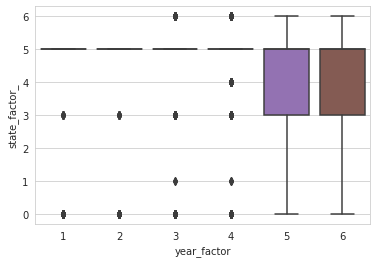

In [113]:
sns.boxplot(data=df, x='year_factor', y='state_factor_')

In [116]:
for i in df.year_factor.unique():
    ix = df.loc[:, 'year_factor'] == i
    print(df.loc[ix, 'state_factor'].unique())

['State_1' 'State_2' 'State_6']
['State_1' 'State_2' 'State_6']
['State_1' 'State_2' 'State_6' 'State_8' 'State_10']
['State_1' 'State_2' 'State_4' 'State_6' 'State_8' 'State_10']
['State_1' 'State_2' 'State_4' 'State_6' 'State_8' 'State_10' 'State_11']
['State_1' 'State_2' 'State_4' 'State_6' 'State_8' 'State_10' 'State_11']


In [118]:
df['state_factor'].value_counts()

State_6     50840
State_11     6412
State_1      5618
State_2      4871
State_4      4300
State_8      3701
State_10       15
Name: state_factor, dtype: int64

In [133]:
# find correlated features
correlated_features = ['january_min_temp', 'cooling_degree_days']
C = df.drop(columns=correlated_features).corr()

In [134]:
for i in range(len(C)):
    tmp = np.abs(C.iloc[i]) > 0.95
    if tmp.sum() > 1:
        print('*'*20)
        print(tmp.name)
        print('*'*20)
        print(tmp[tmp==1])

********************
direction_max_wind_speed
********************
direction_max_wind_speed     True
direction_peak_wind_speed    True
max_wind_speed               True
Name: direction_max_wind_speed, dtype: bool
********************
direction_peak_wind_speed
********************
direction_max_wind_speed     True
direction_peak_wind_speed    True
max_wind_speed               True
Name: direction_peak_wind_speed, dtype: bool
********************
max_wind_speed
********************
direction_max_wind_speed     True
direction_peak_wind_speed    True
max_wind_speed               True
Name: max_wind_speed, dtype: bool


In [137]:
(df['january_max_temp'] / df['january_avg_temp']).describe()

count    75757.000000
mean         1.764479
std          0.236911
min          1.176615
25%          1.661193
50%          1.738851
75%          1.937500
max          3.979104
dtype: float64

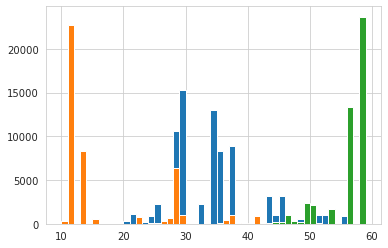

In [141]:
df['january_avg_temp'].hist(bins=range(10, 60));
df['january_min_temp'].hist(bins=range(10, 60));
df['january_max_temp'].hist(bins=range(10, 60));

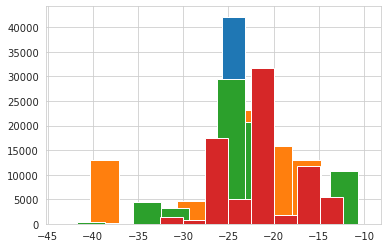

In [143]:
for month in ['january', 'february', 'march', 'april']:
    (df[f'{month}_min_temp'] - df[f'{month}_avg_temp']).hist()

<AxesSubplot:>

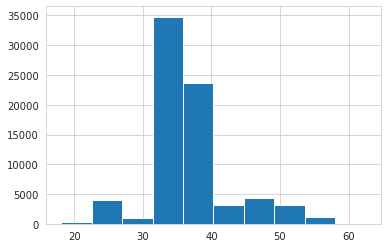

In [147]:
df.loc[:, ['december_avg_temp', 'january_avg_temp', 'february_avg_temp']].mean(axis=1).hist()